In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Functional Approach

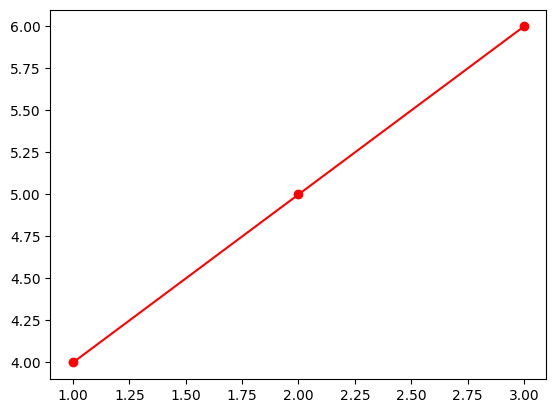

In [2]:
#2 ways to create plots
#Functional approach

plt.figure()
plt.plot([1,2,3], [4,5,6], 'ro-')

# Object-oriented approach

It is reccomended to stick to this form. It provides more flexibility and is the "correct" approach.


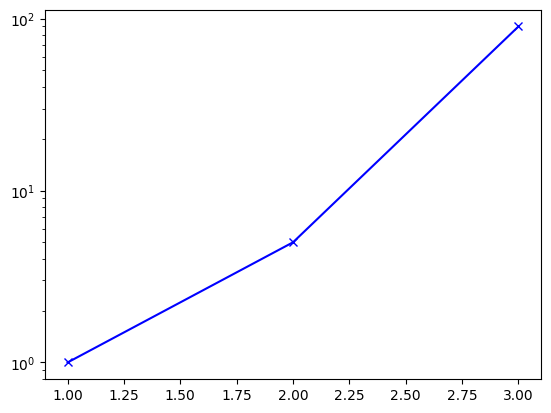

In [15]:
fig, axes = plt.subplots()
axes.semilogy([1,2,3],[1,5,90], 'bx-') #log y axis

# Exercise 

Use your knoweldge of python and appropriate ChatGPT prompts to figure out how to do the following. 

## 1. Change the xlabels, ylabels, fontsizes of the ticklabels
## 2. Plot two lines on the same plot
## 3. Use a legend, Change the location of the legend
## 4. Plot 100 different lines, and use a graded color scheme to color each line

# Image Plots

We can plot images using imshow()

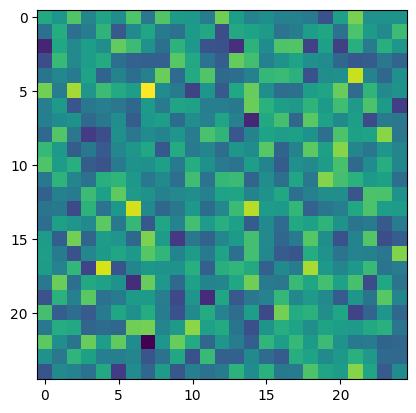

In [5]:
my_arr = np.random.normal(size=(25,25))
fig, axes = plt.subplots()
axes.imshow(my_arr)


# Exercise

1. Make a data array with increasing values along the diagonal, and plot it
2. Add a colorbar to this plot, and change the colormap
3. Add another imshow plot on top that is overlaid

# Multiple Plots



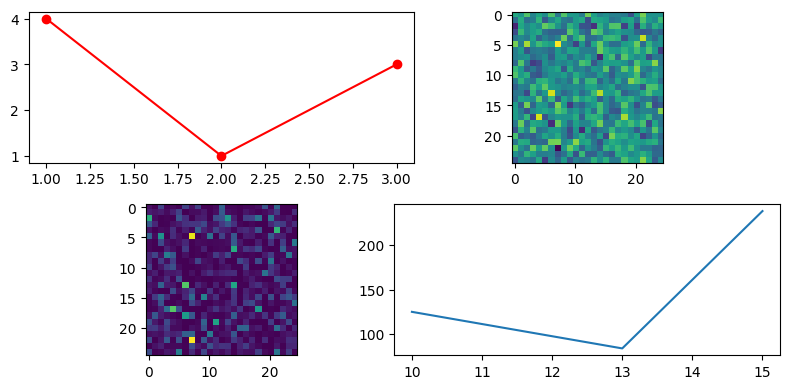

In [7]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8,4))

axes[0,0].plot([1,2,3], [4,1,3], 'ro-')
axes[0,1].imshow(my_arr)
axes[1,0].imshow(my_arr**2)
axes[1,1].plot([10,13,15], [125,84,238])

fig.tight_layout()

In [11]:
#Exercise
# Add colorbars to the plots above. 
#For the line plots, add multiple lines (e.g., 100) and add a colorbar which indexes them.
# Plot 100 images in a 10x10 plot


# Other Plots
## Violin plots, histograms, 3D Plots

Use ChatGPT to generate histograms and violinplots.